## EX05

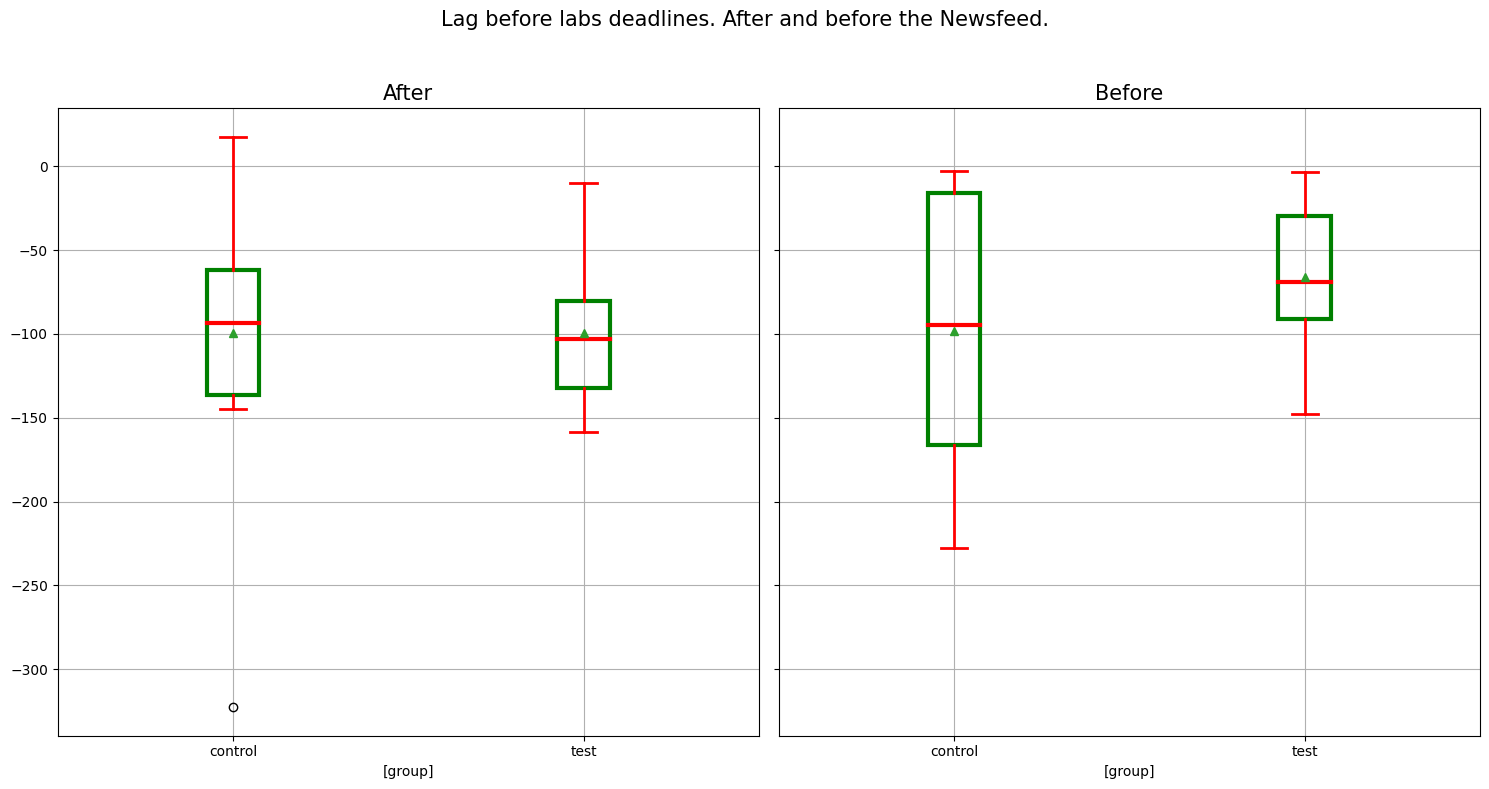

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Чтение данных из ../data
df = pd.read_csv('../data/ab-test.csv')
df.dropna(inplace=True)

groups = ['control', 'test']

# Данные для before и after
after_data = [df[(df['group'] == g) & (df['time'] == 'after')]['diff'] for g in groups]
before_data = [df[(df['group'] == g) & (df['time'] == 'before')]['diff'] for g in groups]

fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
fig.suptitle('Lag before labs deadlines. After and before the Newsfeed.', fontsize=15)

# AFTER subplot
bp1 = axes[0].boxplot(
    after_data,
    labels=groups,
    patch_artist=True,
    boxprops=dict(color='green', facecolor='none', linewidth=3),
    # medianprops=dict(color='red', linewidth=2, linestyle='-'),  # цвет и линия медианы
    showmeans = True,
    whiskerprops=dict(color='red', linewidth=2),
    capprops=dict(color='red', linewidth=2),
    # flierprops=dict(marker='o', color='red', markerfacecolor='none', markersize=6, linestyle='none')  # прозрачные кружки
)
axes[0].set_title('After', fontsize=15)
axes[0].set_xlabel('[group]')
axes[0].grid(True)

# BEFORE subplot
bp2 = axes[1].boxplot(
    before_data,
    labels=groups,
    patch_artist=True,
    boxprops=dict(color='green', facecolor='none', linewidth=3),
    # medianprops=dict(color='red', linewidth=2, linestyle='-'),
    showmeans = True,
    whiskerprops=dict(color='red', linewidth=2),
    capprops=dict(color='red', linewidth=2),
    # flierprops=dict(marker='o', color='red', markerfacecolor='none', markersize=6, linestyle='none')
)
axes[1].set_title('Before', fontsize=15)
axes[1].set_xlabel('[group]')
axes[1].grid(True)

# # Добавляем зелёные треугольники, направленные вверх, на медианы
# for ax, data in zip(axes, [after_data, before_data]):
#     for i, group_data in enumerate(data, start=1):
#         median = group_data.median()
#         ax.plot(i, median, marker='^', color='green', markersize=10)

plt.setp(bp1['medians'],  color='red', linewidth=3)
plt.setp(bp2['medians'],  color='red', linewidth=3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [30]:
from IPython.display import display, Markdown

# Считаем IQR
control_before = df[(df['group'] == 'control') & (df['time'] == 'before')]['diff']
q75 = control_before.quantile(0.75)
q25 = control_before.quantile(0.25)
iqr = q75 - q25

# Выводим красиво
display(Markdown(f"### What was the IQR of the control group before the newsfeed?\n\n"
                 f"The IQR (Interquartile Range) of the control group before the newsfeed is approximately **{round(iqr, 1)}**."))

### What was the IQR of the control group before the newsfeed?

The IQR (Interquartile Range) of the control group before the newsfeed is approximately **150.0**.